# Лабораторная работа #2

Выполнил: Юнусов Рустам М8О-310Б-22

### Подключим нужные библиотеки

In [2]:
import numpy as np
import pandas as pd

### Загрузим `csv` с тренировочными данными

In [33]:
df = pd.read_csv("train.csv")
df.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,...,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2010-06-26,27.0,66829.0,549.0,17290.0,60.0,Divorced,1.0,Rent,1095.0,...,Employed,Associate,4.0,35067.0,0.257790,0.251465,508.970230,0.288013,0.0,66.176500
1,1996-09-23,55.0,172147.0,850.0,16110.0,36.0,Widowed,1.0,Mortgage,211.0,...,Employed,High School,33.0,27001.0,0.086110,0.093173,514.675859,0.050585,1.0,28.495737
2,2015-01-19,51.0,300000.0,850.0,38436.0,36.0,Married,0.0,Mortgage,546.0,...,Employed,Bachelor,28.0,278382.0,0.108436,0.115443,1268.276385,0.072571,1.0,34.488104
3,1981-05-12,25.0,34683.0,847.0,19186.0,48.0,Married,0.0,Other,153.0,...,Employed,High School,0.0,9224.0,0.100686,0.112822,498.505187,0.225415,1.0,36.910753
4,1995-05-07,55.0,300000.0,850.0,30437.0,48.0,Single,2.0,Rent,562.0,...,Employed,Bachelor,31.0,4502.0,0.110437,0.089037,756.035156,0.052721,1.0,31.347091


### Импортируем класс линейной регрессии

In [4]:
from sklearn.linear_model import LinearRegression

### Выделим категориальные признаки в датафрейме и закодируем их

In [34]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
categorical_columns

Index(['ApplicationDate', 'MaritalStatus', 'HomeOwnershipStatus',
       'LoanPurpose', 'EmploymentStatus', 'EducationLevel'],
      dtype='object')

In [35]:
from sklearn.preprocessing import LabelEncoder

#почистим от null cтрок
df = df.dropna()
for feature in categorical_columns:
    le = LabelEncoder()
    df[feature] = le.fit_transform(df[feature])
df.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,...,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,7328,27.0,66829.0,549.0,17290.0,60.0,0,1.0,3,1095.0,...,0,0,4.0,35067.0,0.257790,0.251465,508.970230,0.288013,0.0,66.176500
1,4130,55.0,172147.0,850.0,16110.0,36.0,3,1.0,0,211.0,...,0,3,33.0,27001.0,0.086110,0.093173,514.675859,0.050585,1.0,28.495737
2,8389,51.0,300000.0,850.0,38436.0,36.0,1,0.0,0,546.0,...,0,1,28.0,278382.0,0.108436,0.115443,1268.276385,0.072571,1.0,34.488104
3,562,25.0,34683.0,847.0,19186.0,48.0,1,0.0,1,153.0,...,0,3,0.0,9224.0,0.100686,0.112822,498.505187,0.225415,1.0,36.910753
4,3821,55.0,300000.0,850.0,30437.0,48.0,2,2.0,3,562.0,...,0,1,31.0,4502.0,0.110437,0.089037,756.035156,0.052721,1.0,31.347091


### Визуализируем данные RiskScore и почистим от выбросов

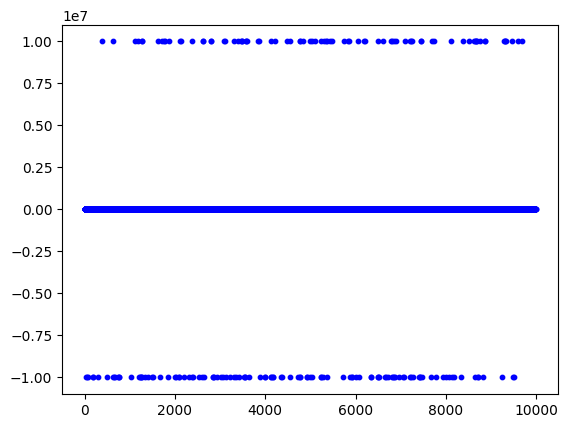

In [36]:
import matplotlib.pyplot as plt

plt.scatter(np.arange(0, len(df['RiskScore'])), df['RiskScore'], c ="blue", s = 10)
 
# To show the plot
plt.show()

#### Из графика видно, что в данных есть невалидные RiskScore
как например <0 и незначительное число близлежащих к 1e7
можем спокойно их убрать

In [67]:
df = df.drop(df[df['RiskScore'] < 0].index)
df = df.drop(df[df['RiskScore'] > 100].index)
df

,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,...,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,7328,27.0,66829.0,549.0,17290.0,60.0,0,1.0,3,1095.0,...,0,0,4.0,35067.0,0.257790,0.251465,508.970230,0.288013,0.0,66.176500
1,4130,55.0,172147.0,850.0,16110.0,36.0,3,1.0,0,211.0,...,0,3,33.0,27001.0,0.086110,0.093173,514.675859,0.050585,1.0,28.495737
2,8389,51.0,300000.0,850.0,38436.0,36.0,1,0.0,0,546.0,...,0,1,28.0,278382.0,0.108436,0.115443,1268.276385,0.072571,1.0,34.488104
3,562,25.0,34683.0,847.0,19186.0,48.0,1,0.0,1,153.0,...,0,3,0.0,9224.0,0.100686,0.112822,498.505187,0.225415,1.0,36.910753
4,3821,55.0,300000.0,850.0,30437.0,48.0,2,2.0,3,562.0,...,0,1,31.0,4502.0,0.110437,0.089037,756.035156,0.052721,1.0,31.347091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11010,1323,47.0,88686.0,648.0,5472.0,12.0,0,2.0,3,98.0,...,0,1,23.0,121698.0,0.156472,0.164928,497.756143,0.080611,1.0,41.553066
11011,243,39.0,300000.0,850.0,7721.0,72.0,0,5.0,2,276.0,...,0,0,16.0,18607.0,0.107721,0.108596,146.407421,0.016896,1.0,28.051757
11012,7336,57.0,300000.0,850.0,14756.0,48.0,1,2.0,2,620.0,...,0,0,38.0,167544.0,0.094756,0.106387,378.792448,0.039952,1.0,32.440586
11013,5786,28.0,15000.0,300.0,51361.0,96.0,2,1.0,2,696.0,...,0,1,5.0,116879.0,0.446361,0.401087,1793.042130,1.991234,0.0,67.673170


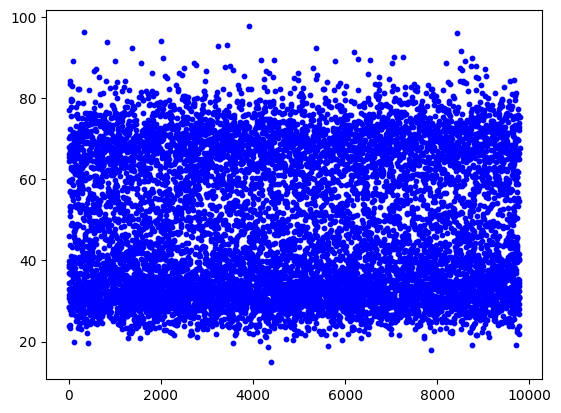

In [38]:
plt.scatter(np.arange(0, len(df['RiskScore'])), df['RiskScore'], color = 'blue', s=10)

plt.show()

#### Теперь видно, что плотность данных нормализовалась и выбросов нет

###  Построим матрицу корреляций для данных

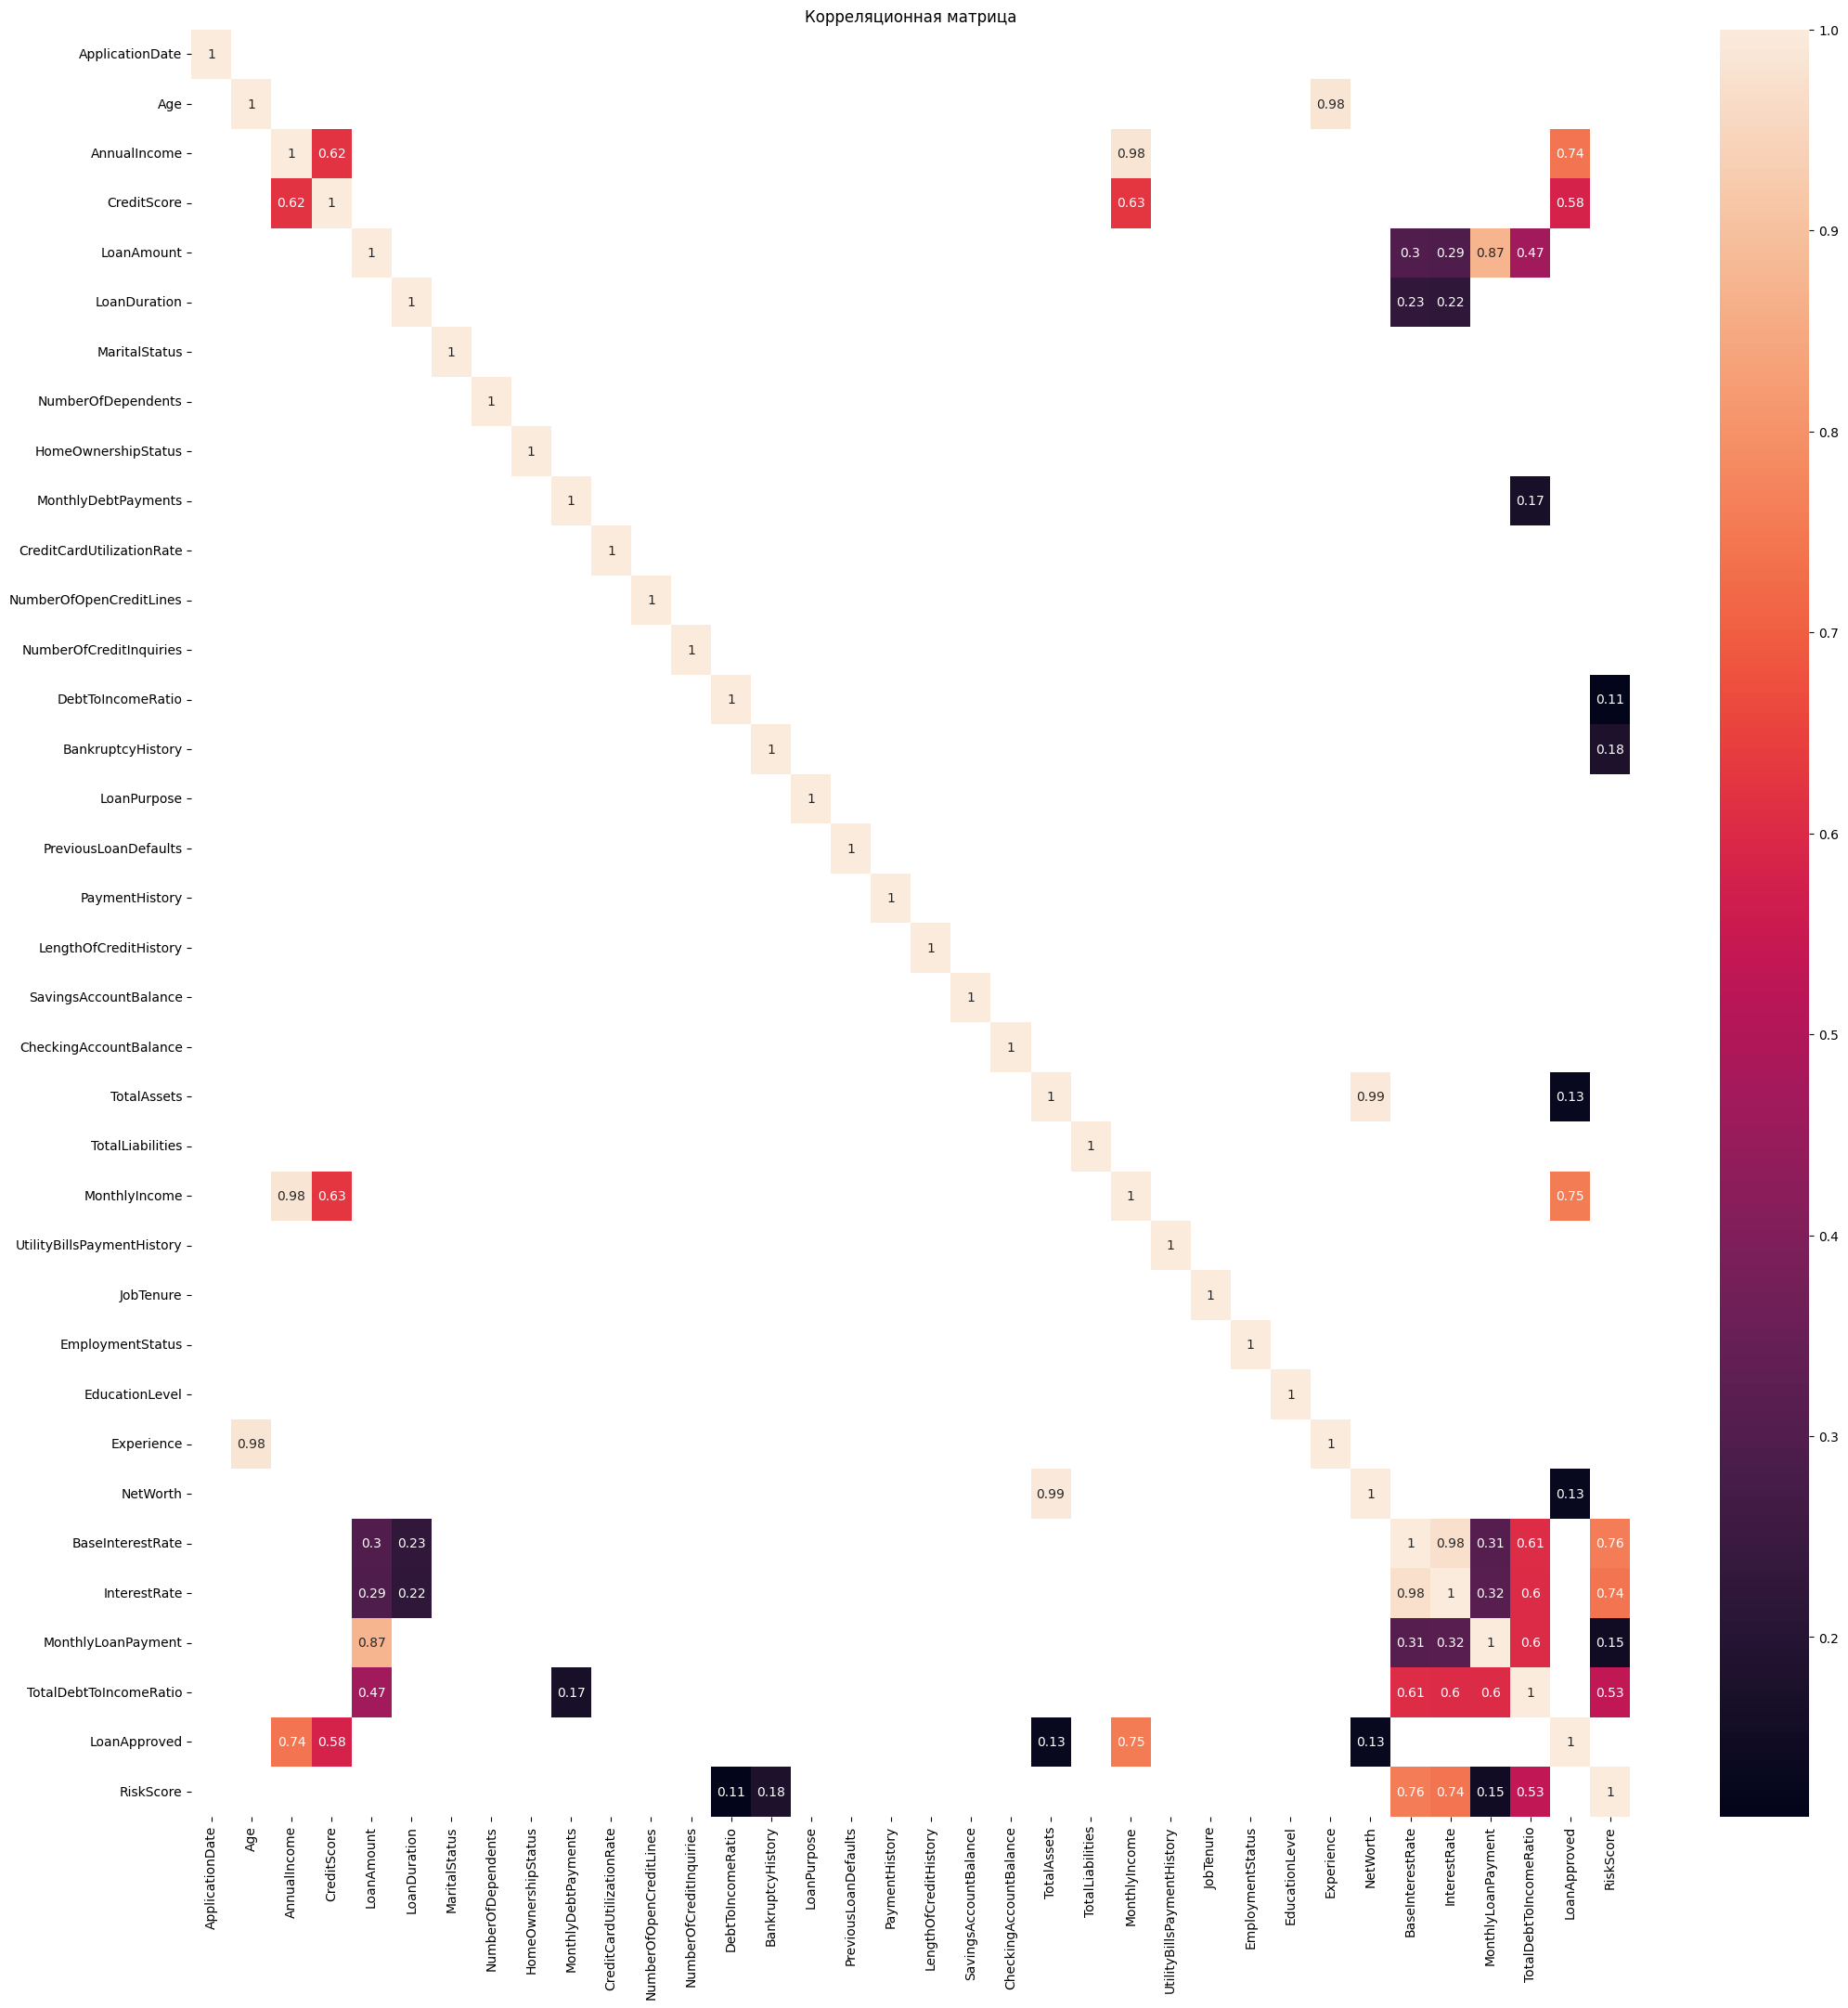

In [53]:
import seaborn as sn
matrix = df.corr()

# на обычных размерах ничего не видно
plt.figure(figsize = (25, 25))

sn.heatmap(matrix[matrix > 0.1], annot = True)
plt.title('Корреляционная матрица')
plt.show()

### Рассмотрим сильные корреляции между данными

In [58]:
strong = matrix[(matrix >= 0.8) & (matrix != 1.)].stack()
strong

Age                 Experience            0.982958
AnnualIncome        MonthlyIncome         0.984978
LoanAmount          MonthlyLoanPayment    0.872616
TotalAssets         NetWorth              0.993996
MonthlyIncome       AnnualIncome          0.984978
Experience          Age                   0.982958
NetWorth            TotalAssets           0.993996
BaseInterestRate    InterestRate          0.975344
InterestRate        BaseInterestRate      0.975344
MonthlyLoanPayment  LoanAmount            0.872616
dtype: float64

Видно несколько коррелирующих полей, но эмпирическим путем выявлено, что их корреляция не сильно влияет на итоговый результат

### Выделим обучающую выборку

In [59]:
X_train = df.drop(columns=['RiskScore'])
X_train.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,...,JobTenure,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved
0,7328,27.0,66829.0,549.0,17290.0,60.0,0,1.0,3,1095.0,...,4.0,0,0,4.0,35067.0,0.257790,0.251465,508.970230,0.288013,0.0
1,4130,55.0,172147.0,850.0,16110.0,36.0,3,1.0,0,211.0,...,2.0,0,3,33.0,27001.0,0.086110,0.093173,514.675859,0.050585,1.0
2,8389,51.0,300000.0,850.0,38436.0,36.0,1,0.0,0,546.0,...,3.0,0,1,28.0,278382.0,0.108436,0.115443,1268.276385,0.072571,1.0
3,562,25.0,34683.0,847.0,19186.0,48.0,1,0.0,1,153.0,...,3.0,0,3,0.0,9224.0,0.100686,0.112822,498.505187,0.225415,1.0
4,3821,55.0,300000.0,850.0,30437.0,48.0,2,2.0,3,562.0,...,5.0,0,1,31.0,4502.0,0.110437,0.089037,756.035156,0.052721,1.0


In [60]:
Y_train = df['RiskScore']
Y_train.head()

0    66.176500
1    28.495737
2    34.488104
3    36.910753
4    31.347091
Name: RiskScore, dtype: float64

### Объявляем и тренируем модель

In [61]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

### Загружаем тестовые данные и чистим

In [62]:
test_df = pd.read_csv('test.csv')

# кодируем категориальные признаки
ID = test_df['ID']
test_df = test_df.drop(columns=['ID'])

for feature in categorical_columns:
    le = LabelEncoder()
    test_df[feature] = le.fit_transform(test_df[feature])

test_df = test_df.fillna(0)

test_df.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,...,JobTenure,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved
0,1,49,207095,850,14458,60,2,0,3,376,...,6,0,3,23,10626,0.104458,0.125350,325.532336,0.040650,1
1,3255,28,64653,674,65491,48,2,2,2,238,...,3,0,3,3,299024,0.233491,0.260561,2210.247757,0.454410,0
2,4222,41,300000,768,16811,60,2,1,2,469,...,3,0,3,19,6979,0.147811,0.154571,403.977431,0.034919,1
3,1977,50,300000,850,48737,36,0,0,0,567,...,3,1,1,26,8438,0.118737,0.099712,1571.946906,0.085558,1
4,166,35,300000,672,51916,60,2,6,0,106,...,7,0,0,12,436216,0.230916,0.237727,1486.675235,0.063707,1


### Выделяем тестовую выборку

In [63]:
X_test = test_df
X_test.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,...,JobTenure,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved
0,1,49,207095,850,14458,60,2,0,3,376,...,6,0,3,23,10626,0.104458,0.125350,325.532336,0.040650,1
1,3255,28,64653,674,65491,48,2,2,2,238,...,3,0,3,3,299024,0.233491,0.260561,2210.247757,0.454410,0
2,4222,41,300000,768,16811,60,2,1,2,469,...,3,0,3,19,6979,0.147811,0.154571,403.977431,0.034919,1
3,1977,50,300000,850,48737,36,0,0,0,567,...,3,1,1,26,8438,0.118737,0.099712,1571.946906,0.085558,1
4,166,35,300000,672,51916,60,2,6,0,106,...,7,0,0,12,436216,0.230916,0.237727,1486.675235,0.063707,1


### Запускаем predict

In [64]:
Y_pred = model.predict(X_test)
Y_pred

array([32.80289542, 57.15897752, 30.23897539, ..., 63.97423827,
       51.99469253, 80.08213949])

### Cоставляем результирующий датафрейм

In [65]:
result = pd.DataFrame( { "ID": ID, "RiskScore" : Y_pred })

result

,ID,RiskScore
0,0,32.802895
1,1,57.158978
2,2,30.238975
3,3,33.067520
4,4,35.025832
...,...,...
4995,4995,32.789093
4996,4996,59.627220
4997,4997,63.974238
4998,4998,51.994693


### Сохраняем результат

In [66]:
result.to_csv('submission.csv', index=False)